# Lecture 14: Introduction to Correlation and Regression in PANDAS 
***

Correlation describes the relationship between two variables. If variables are correlated, we can say that they change relative to each other. As one increases, the other might increase or decrease. We can quantify the strength of that correlation.

Start by loading Numpy and Pandas using their common aliases, np and pd. 

In [2]:
import numpy as np 
import pandas as pd

We're going to use Matplotlib's Pylab library, so let's load that. Doing it this way, we can view the plots directly in the notebook.  

In [3]:
import matplotlib.pylab as plt
%matplotlib inline

I created a .csv file of some offensive statistics, such as hits and runs, as well as ERA and attendance for every team 2011 - 2016, downloaded from the Lahman database.

The file, teamWinsAndBatting.csv, is on Moodle.

We can load the data into a Pandas DataFrame using read_csv( ). You may need to change the file_path variable to point to the correct location. 

In [4]:
local_path = 'data/teamWinsAndBatting.csv'

# Select the path that works for you 
file_path = local_path 

# Load the data into a DataFrame 
dfTW= pd.read_csv(file_path)

# Inspect some of the data
dfTW.head()

,yearID,teamID,W,R,H,SO,BB,SF,ERA,attendance
0,2011,ARI,94,731,1357,1249,531,33,3.80,2105432
1,2011,ATL,89,641,1345,1260,504,30,3.48,2372940
2,2011,BAL,69,708,1434,1120,452,43,4.89,1755461
3,2011,BOS,90,875,1600,1108,578,50,4.20,3054001
4,2011,CHA,79,654,1387,989,475,46,4.10,2001117


The data has columns for: 

- **yearID**: The year 
- **teamID**: The team 
- **W**: Number of wins for the team that year
- **R**: Number of runs the team scored that year
- **H**: Number of hits the team got that year
- **SO**: Number of strikeouts the team had that year while batting
- **BB**: Number of walks the team received that year
- **SF**: Number of sacrifice flies the team hit that year
- **ERA**: Team ERA for pitchers
- **attendance**: Total number of people who attended the games that year

## Can we predict Wins?

We care about team wins more than anything else, and we want to know if there's anything in the other data that will help us predict how many games a team is going to win.

### Scatterplots 

We can start by visualizing our data to see if anything jumps out. Maybe we start with the hypothesis that teams that score more runs win more games.

To visualize the relationships between different variables, it can be helpful to create a scatterplot of the data. The following code generates a scatter plot depicting the relationship between Wins and Runs. We put Runs on the x-axis as the independent variable and Wins on the y-axis as the dependent variable. 

From the plot, we determine: 

- There appears to be a relationship between the number of runs a team scores and the number of wins they get. 
- Wins increases as Runs increases
- Not a perfectly linearly relationship. 
- Several data points of teams with few Runs and many Wins.

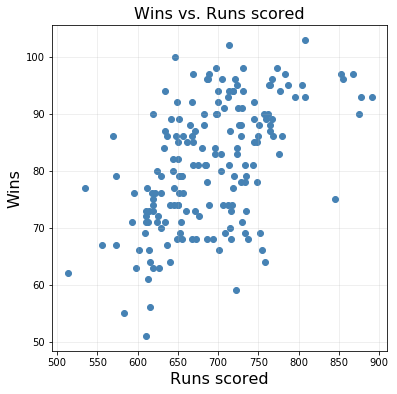

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
axes.scatter(dfTW["R"], dfTW["W"], color = "steelblue")
axes.grid(alpha=0.25)
axes.set_xlabel("Runs scored", fontsize=16)
axes.set_ylabel("Wins", fontsize=16)
axes.set_title("Wins vs. Runs scored", fontsize=16)

### Exercise 1
***
Explore scatterplots with other variables. Comment on how other variables change relative to each other, and Wins.

## Correlation  - Pearson's R
***

We can evaluate the strength, and the direction, of the linear relationship between two variables using Pearson's R. We get a score +/-1, where +1 signifies a strong positive relationship - as one variable is increasing, so is the other variable - and -1 signifies a strong negative relationship - as one variable is increasing, the other variable is decreasing. We calculate the correlation using the Z-scores for each variable:

$$ r = \frac{\sum{Z_xZ_y}}{n} $$

In Pandas, there is a correlation method that we can call on a column in our data frame. Here, we see the correlation between Wins and Runs:

In [6]:
dfTW['W'].corr(dfTW['R'], method='pearson')

0.52525369387651744

We can also call corr on the entire data frame, which gives us the pairwise correlations between all numerical variables. We can drop individual columns, such as yearID, where it doesn't really make sense to do a correlation score.

In [7]:
dfTW.drop(['yearID'], axis=1).corr(method='pearson')

,W,R,H,SO,BB,SF,ERA,attendance
W,1.000000,0.525254,0.300618,-0.177205,0.412843,0.258277,-0.718398,0.410191
R,0.525254,1.000000,0.730222,-0.171321,0.433201,0.418392,0.078052,0.318523
H,0.300618,0.730222,1.000000,-0.455287,0.038481,0.415964,0.184194,0.325897
SO,-0.177205,-0.171321,-0.455287,1.000000,0.117221,-0.323982,0.072697,-0.258297
BB,0.412843,0.433201,0.038481,0.117221,1.000000,0.254327,-0.280137,0.127303
SF,0.258277,0.418392,0.415964,-0.323982,0.254327,1.000000,-0.068330,0.096702
ERA,-0.718398,0.078052,0.184194,0.072697,-0.280137,-0.068330,1.000000,-0.216473
attendance,0.410191,0.318523,0.325897,-0.258297,0.127303,0.096702,-0.216473,1.000000


From the data, we see a few things
- There is a strong negative correlation between ERA and Wins.
- There is a strong positive correlation between Hits and Runs
- The strongest positive correlation with attendance is Wins, and the strongest negative correlation is Strikeouts
- Strike outs are also negatively correlated with Hits.

### Coefficient of determination, $R^2$
***
The coefficient of determination, more commonly known as $R^2$, measures the proportion of variance in Y explained by X, e.g. How much does Runs explain the variance in Wins. Using the R for Runs and Wins, we calculate:

$$(0.525254)^2 = 0.2759$$

which tells us that 27.59% of the variance in Wins can be explained by how many Runs a team scores. That's not very much.

In [33]:
dfTW['W'].corr(dfTW['R'], method='pearson')**2

0.27589144293092627

### Linear Regression 
***
  

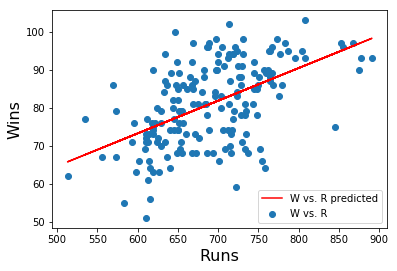

In [31]:
#def plot_line():
m = 0.086
b = 21.63
y = m * dfTW['R'].copy() + b
x = dfTW['R'].copy()
fig, ax = plt.subplots()
scatter = ax.scatter(x,dfTW['W'],marker='o',label="W vs. R")
line = ax.plot(x,y, color='red',label="W vs. R predicted")
ax.set_xlabel("Runs", fontsize=16)
ax.set_ylabel("Wins", fontsize=16)
plt.legend()

Note that the result is a standard box-and-whiskers plot with a box, where
* The top of the box is Q3 - the upper quartile
* The bottom of the box is Q1 - the lower quartile
* The median line is in the middle of the box
* Whisker lines are furthest points that are not outliers
* Outliers that fall more than $1.5 \times IQR$ outside of the nearest quartile. 

Unfortunately, the default parameters don't lend themselves well to easy-to-read plots, so we'll make a few tweaks. 

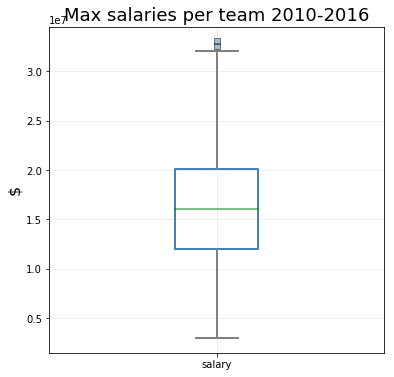

In [48]:
# Initialize figure 
fig, ax = plt.subplots(figsize=(6,6))


# Plot histogram, but this time return dictionary of style parameters for modification after the fact 
bp = dfMS.boxplot(column="salary", ax=ax, widths=[.25], return_type='dict');

# ---------------------------------------
# Set properties of various parts of plot 
# ---------------------------------------

# Change properties of boxes 
for box in bp['boxes']:
    box.set(color='steelblue', linewidth=2)
    
# Change properties of whiskers 
for whisker in bp['whiskers']:
    whisker.set(color='gray', linewidth=2)
    
# Change properties of caps 
for cap in bp['caps']:
    cap.set(color='gray', linewidth=2)
    
# Change properties of median 
for cap in bp['medians']:
    cap.set(color='green', linewidth=2, alpha=0.5)
    
# Change properties of fliers (outliers) 
for flier in bp['fliers']:
    flier.set(markerfacecolor='steelblue', linewidth=2, marker='s', markersize=6, alpha=0.5)

# Set title and vertical axis label
ax.set_title('Max salaries per team 2010-2016', fontsize=18)
ax.set_ylabel("$", fontsize=16)

# Make grid-lines lighter
ax.grid(alpha=0.25)

Notice that the default settings for boxplot( ) gives us whiskers and outliers as described in lecture.  That is, the length of the whiskers are set equal to the largest distance between an observation and the upper or lower quartile that is less than $1.5 \times IQR$.  Any data point beyond this distance is drawn as an outlier (or a _flier_ as Pandas calls them).   

Box-and-whisker plots are great for visualizing the spread of the data, outliers, and skew of the data.  For instance, from this box-and-whisker plot we can tell that the data is symetric because the median is evenly between the upper quartile $Q_3$ and the lower quartile $Q_1$. The data also includes outliers in the higher salary range. 

Box-and-whisker plots are especially useful for comparing multiple sets of observations.  For instance, we can use side-by-side box-and-whisker plots to compare the salaries at different positions. We already created a data frame from the pitchers data. We could compare pitchers to outfielders, for example.

Note that the trick here is to select the rows of the DataFrame corresponding only to POS = P or POS = OF and then call boxplot( ) with the **by** parameter to break the data into the two sets based on the value of the **POS** column.  

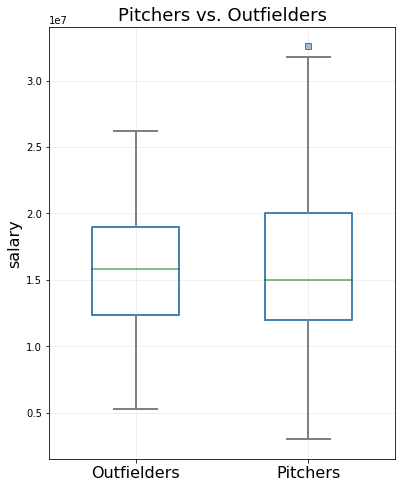

In [66]:
# Initialize figure 
fig, ax = plt.subplots(figsize=(6,8))

# To get just the columns corresponding to P and OF, we 
# select only the rows of the DataFrame coresponding to those names, then 
# call boxplot and pass by="POS" to break the data into the two sets 
bp = dfMS.loc[(dfMS["POS"]=='P') | (dfMS["POS"]=='OF')].boxplot(
    column=["salary"], by="POS", ax=ax, widths=[.5, .5], return_type="dict")

# This time, bp is a Pandas series containing multiple dictionaries
# corresponding to the two sets of data. We loop over each one individually 
# and set the parameters we want 
for column in bp:
    
    # Change properties in boxes 
    for box in column['boxes']:
        box.set(color='steelblue', linewidth=2)
    
    # Change properties of whiskers 
    for whisker in column['whiskers']:
        whisker.set(color='gray', linewidth=2)

    # Change properties of caps 
    for cap in column['caps']:
        cap.set(color='gray', linewidth=2)

    # Change properties of median 
    for cap in column['medians']:
        cap.set(color='green', linewidth=2, alpha=0.5)

    # Change properties of fliers (outliers) 
    for cap in column['fliers']:
        cap.set(markerfacecolor='steelblue', linewidth=2, marker='s', markersize=6, alpha=0.5)

# Set title and vertical axis label
ax.set_title('Pitchers vs. Outfielders', fontsize=18)
ax.set_ylabel("salary", fontsize=16)

# Set names of plots
plt.xticks([1,2],["Outfielders", "Pitchers"], rotation=0, fontsize=16)

# Get rid of automatically generated titles and xlables
plt.suptitle("")
ax.set_xlabel("")

# Make grid-lines lighter
ax.grid(alpha=0.25);

From the side-by-side box-and-whiskers plots we can easily see several things 

- Pitchers have a larger salary range than outfielders
- Pitchers are positively skewed, while outfielders are symetric 
- There is more variability in the middle 50% of the Pitchers data than in the middle 50% of the outfielders data

### Exercise 4
***

Plot side-by-side box and whisker plots of the salary data for **all** positions individually. You might need to modify the plot parameters until you get a graphic that doesn't look too cramped.  Note that it might be helpful to make the figure much wider and rotate the horizontal labels 90 degrees. 

### Exercise 5
***

Produce a box and whisker plot of the winning pecentage data. Comment on how the box and whisker plot compares to the histogram for the same data. 